In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('./data/datos.csv', encoding = "UTF-8")
data.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,clase
0,284.92805,350.67788,-0.00093,322.79277,315.33405,8.39052,347.40954,277.24308,11.12329,372.08923,...,286.79234,172.75314,-6.02986,295.90823,144.13841,-4.17843,305.38755,114.55426,-2.41008,0
1,278.28085,345.40205,-0.00130,318.74006,314.35025,6.34735,346.35429,277.35317,8.47528,371.35733,...,291.32571,172.43149,-7.07840,299.57190,145.29706,-6.46456,307.54150,116.75922,-6.23263,0
2,276.40025,344.67422,-0.00131,317.00817,313.70587,5.75395,344.34662,276.55692,7.94423,366.93927,...,289.30880,173.07098,-7.00137,296.22140,146.44763,-6.53205,303.59922,118.51561,-6.35039,0
3,274.34967,343.92245,-0.00131,317.74627,312.19434,7.38592,345.21930,274.20845,10.34781,368.13793,...,290.49569,170.87830,-5.92087,299.04903,143.51583,-5.19691,307.87086,115.32076,-4.96793,0
4,273.91013,343.22628,-0.00133,320.29775,310.32568,7.56058,349.07755,272.35242,10.71873,373.16762,...,291.84546,169.00737,-5.37861,299.95371,141.54401,-4.62802,307.74208,113.48242,-4.36697,0


Separar train y test

In [5]:
X, y = data.drop(['clase'], axis=1), data['clase']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [7]:
X_train.shape

(10203, 63)

In [50]:
xy_preprocessor = make_pipeline(
    MinMaxScaler(feature_range=(0,1))
)

z_preprocessor = make_pipeline(
    MinMaxScaler(feature_range=(0,1))
)

x_columns = ('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20')
y_columns = ('y0','y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15','y16','y17','y18','y19','y20')
z_columns = ('z0','z1','z2','z3','z4','z5','z6','z7','z8','z9','z10','z11','z12','z13','z14','z15','z16','z17','z18','z19','z20')

preprocessor = make_column_transformer(
    (xy_preprocessor, x_columns),
    (xy_preprocessor, y_columns),
    (z_preprocessor, z_columns),
    remainder='passthrough'
)

X_train_prepared = MinMaxScaler(feature_range=(0,1)).fit_transform(X_train)
X_test_prepared = MinMaxScaler(feature_range=(0,1)).fit_transform(X_test)

## SGD Classifiers

In [7]:
sgd_clf = SGDClassifier(n_jobs=-1, early_stopping=True, verbose=20)

In [8]:
param_grid = {
    'alpha': [1E-4, 1E-2, 1E-1, 1, 1E1],
    'max_iter': [1000, 10000, 30000]
}

grid_sgd_clf = GridSearchCV(sgd_clf, param_grid)
%time grid_sgd_clf.fit(X_train_prepared, y_train)
grid_sgd_clf.best_params_

ok 0.19 seconds
Convergence after 6 epochs took 0.20 seconds

Total training time: 0.19 seconds.
Convergence after 6 epochs took 0.21 seconds
Convergence after 6 epochs took 0.21 seconds
Convergence after 6 epochs took 0.20 seconds
Convergence after 6 epochs took 0.20 secondsConvergence after 6 epochs took 0.20 seconds

Convergence after 6 epochs took 0.20 seconds
Convergence after 6 epochs took 0.22 seconds
Convergence after 6 epochs took 0.21 seconds
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1Norm: 0.07, NNZs: 63, Bias: -0.744515, T: 7346, Avg. loss: 0.158359
-- Epoch 1



Total training time: 0.01 seconds.
-- Epoch 1Norm: 0.07, NNZs: 63, Bias: -0.729746, T: 7346, Avg. loss: 0.151634Norm: 0.07, NNZs: 63, Bias: -0.728051, T: 7346, Avg. loss: 0.191737

-- Epoch 1
Total training time: 0.01 seconds.

Norm: 0.06, NNZs: 63, Bias: -0.753330, T: 7346, Avg. loss: 0.18

{'alpha': 0.0001, 'max_iter': 30000}

In [9]:
grid_sgd_clf.best_score_

0.7897521399544629

### Prediction

In [10]:
y_predict = grid_sgd_clf.predict(X_test_prepared)
y_predict

array([2, 2, 7, ..., 4, 4, 4])

### Validation

In [11]:
report_sgd_clf = classification_report(y_test, y_predict)
print("Test Report\n", report_sgd_clf)

Test Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       235
           1       0.96      0.97      0.96       267
           2       0.98      0.94      0.96       272
           3       1.00      0.90      0.94       234
           4       0.72      0.90      0.80       255
           5       0.73      0.70      0.71       204
           6       0.99      0.68      0.81       228
           7       0.82      0.85      0.83       225
           8       0.54      0.97      0.69       211
           9       0.95      0.38      0.55       216
          10       1.00      1.00      1.00       204

    accuracy                           0.85      2551
   macro avg       0.88      0.84      0.84      2551
weighted avg       0.88      0.85      0.85      2551



## Random Forest

In [51]:
random_forest_clf = RandomForestClassifier(n_jobs=-1)

In [52]:
random_forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
y_predict_train = random_forest_clf.predict(X_train_prepared)
y_predict_test = random_forest_clf.predict(X_test_prepared)

In [54]:
report_random_forest_clf_train = classification_report(y_train, y_predict_train)
report_random_forest_clf_test = classification_report(y_test, y_predict_test)
print("Test Report for train\n", report_random_forest_clf_train)
print("Test Report for test\n", report_random_forest_clf_test)

Test Report for train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00      1033
           2       1.00      1.00      1.00      1012
           3       1.00      1.00      1.00      1033
           4       1.00      1.00      1.00      1034
           5       1.00      1.00      1.00       942
           6       1.00      1.00      1.00       822
           7       1.00      1.00      1.00       923
           8       1.00      1.00      1.00       904
           9       1.00      1.00      1.00       856
          10       1.00      1.00      1.00       790

    accuracy                           1.00     10203
   macro avg       1.00      1.00      1.00     10203
weighted avg       1.00      1.00      1.00     10203

Test Report for test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      0.99

In [13]:
y_predict_test.shape

(2551,)

In [14]:
y_test

2657    2
2617    2
9101    7
335     0
9224    7
       ..
1468    1
6470    5
5610    4
6476    5
5009    4
Name: clase, Length: 2551, dtype: int64

Text(54.260000000000005, 0.5, 'predicted label')

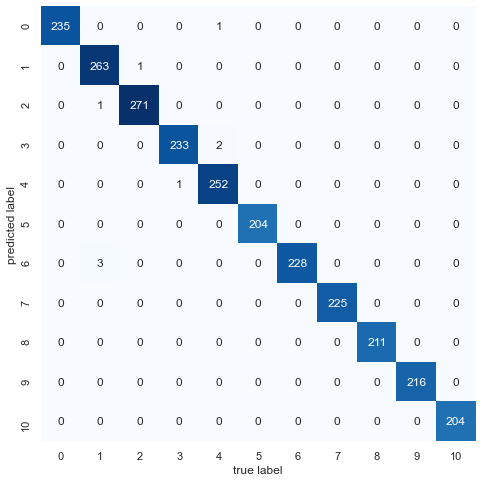

In [55]:
sns.set()
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, y_predict_test)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False, xticklabels=[0,1,2,3,4,5,6,7,8,9,10], yticklabels=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [56]:
# Export model
import joblib

joblib.dump(random_forest_clf, 'random-forest-estimator.pkl', compress=0)

['random-forest-estimator.pkl']

## Export to js

In [16]:
from sklearn_porter import Porter

porter = Porter(random_forest_clf, language='js')
output = porter.export(embed_data=True)

output

                     }\n                                    } else {\n                                        if (features[49] <= 0.7031055390834808) {\n                                            if (features[45] <= 0.6114853322505951) {\n                                                classes[0] = 0; \n                                                classes[1] = 0; \n                                                classes[2] = 0; \n                                                classes[3] = 0; \n                                                classes[4] = 0; \n                                                classes[5] = 0; \n                                                classes[6] = 0; \n                                                classes[7] = 37; \n                                                classes[8] = 0; \n                                                classes[9] = 0; \n                                                classes[10] = 0; \n                                

In [57]:

two_instance = [94.43048955211765,419.7478853040064,-0.0010404882486909628,150.2963194157916,389.78786960846503,-11.749335289001465,190.08367078862454,331.4872349132405,-16.887649536132812,165.17896741578585,289.78967484788956,-21.89144515991211,124.37891568982053,274.34570928677505,-24.657461166381836,163.8023485678489,224.40940846121734,-0.15041576325893402,184.7677488490072,163.54181716588982,-1.8722641468048096,195.8757625662971,119.82628589582885,-3.039231300354004,200.71583792563166,82.87481288158517,-3.7977633476257324,119.31553860214439,222.73324184397555,0.014385937713086605,112.80115633128129,162.23042381795204,2.762725353240967,98.48983438454148,110.46523593405888,3.3620316982269287,82.61691437674914,60.658947667153,3.1576144695281982,85.4687304675871,248.44924854868862,-2.591155529022217,87.96972992330633,215.61991582511664,-14.829318046569824,106.5454379592627,253.8283635978242,-19.98552131652832,111.03775629694981,281.0608699718162,-20.161684036254883,59.49261270387055,285.30293065966043,-5.4740705490112305,73.9776391215836,256.32609034417715,-19.469520568847656,105.37135041677999,284.55896984166054,-23.89093017578125,124.4657847738958,315.77712983402176,-25.59885025024414]
two_instance = np.array(two_instance).reshape(1, -1)

In [58]:
two_instance_prepared = MinMaxScaler().fit_transform(two_instance)

In [59]:
random_forest_clf.predict(two_instance_prepared)

array([4])

In [45]:
one_instance = [94.20808047742614, 506.08927697107237, -0.001212984323501587, 143.75807607916627, 472.22444921580467, -11.721441268920898, 170.69873625908414, 420.89098075809926, -18.002216339111328, 159.2304116140877, 376.878238377065, -23.604740142822266, 130.85991857784657, 352.8463810453243, -26.661266326904297, 149.86789012550867, 342.4165159043352, -0.0061792125925421715, 147.36490592086793, 275.3609653804849, -7.0524139404296875, 139.95281349498848, 230.25757714967583, -11.79425048828125, 133.98501217567141, 193.40482275246308, -13.85203742980957, 113.57791083745951, 350.7477138248931, -0.11119984090328217, 120.15689637636274, 313.751690283036, -15.781929969787598, 132.0561800003979, 363.1797253555992, -23.270856857299805, 135.75020032612633, 392.7564786020523, -20.458223342895508, 81.4666892192119, 368.5821784450516, -2.3299670219421387, 87.79062692616057, 342.95260428620634, -18.373777389526367, 107.54991394666882, 388.91960555672233, -24.72141456604004, 114.20852618362454, 414.39567132716, -21.6873836517334, 52.53370254922656, 392.95744415494204, -5.289149761199951, 63.50394742019705, 372.70205134416676, -17.10453224182129, 85.35575136869446, 399.5572133750978, -20.56826400756836, 94.18564325907333, 418.33063377857127, -17.532472610473633]

one_instance = np.array(one_instance).reshape(1, -1)
one_instance_prepared = MinMaxScaler().fit_transform(one_instance)

In [48]:
random_forest_clf.predict(one_instance)

array([1])